# Landuse & Landcover change of Knox County, TN

### Analyzing land use and land cover in specific locations like Knox County, Tennessee, is important to make important decisions for policy, understanding the growth and environmental impacts.

In [12]:
import ee
import geemap
geemap.ee_initialize()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%pip install pygis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.9/102.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.1/221.1 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 33.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 95.1 MB/

# Study Area: Knox County, Tennessee

In [ ]:
counties = ee.FeatureCollection('TIGER/2016/Counties')
knox_counties = counties.filter(ee.Filter.eq("NAME", "Knox"))
knox_tn = knox_counties.filter(ee.Filter.eq("STATEFP", '47'))

In [ ]:
Map = geemap.Map()

Map.addLayer(knox_tn.style(**{'color': 'ff0000ff', 'fillColor': '00000000'}), {}, 'Knox County, TN')
Map.centerObject(knox_tn)
Map.add_text('Knox County, Tennessee', add_header=False)
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

# Comparison of land use and land cover change in different years.

I am using the [NLCD](https://developers.google.com/earth-engine/datasets/catalog/USGS_NLCD_RELEASES_2021_REL_NLCD) data from 2001, 2004, 2006, 2008, 2011, 2016, 2019, and 2021. The USGS, in partnership with several federal agencies, developed and released NLCD products in two-to-three-year intervals between 2001 and 2021. These products provide spatially explicit, multi-temporal, consistent, and reliable information on the Nation’s land use and land cover change.

In [ ]:
# First looking into the timelapse to visualize any apparent change in the landforms

In [ ]:
timelapse = geemap.landsat_timelapse(
    knox_tn,
    out_gif='landsat.gif',
    start_year=1984,
    end_year=2022,
    start_date='01-01',
    end_date='12-31',
    bands=['SWIR1', 'NIR', 'Red'],
    frames_per_second=5,
    title='Landsat Timelapse',
    progress_bar_color='blue',
    mp4=True,
)
geemap.show_image(timelapse)

Generating URL...
Please wait ...
The GIF image has been saved to: /content/landsat.gif


Output()

In [ ]:
# Calculating the area of similar data from 2001, 2004, 2006, 2008, 2011, 2016, 2019 and 2021 of NLCD dataset.

In [ ]:
# The full code for 2021 and 2001 as an example

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)
dataset = ee.FeatureCollection('USGS/WBD/2017/HUC12').filterBounds(knox_tn)

style = {
    'color': '0000ffff',
    'fillColor': '00000000'
}

Map.addLayer(dataset, {}, 'Dataset', False)
Map.addLayer(dataset.style(**style), {}, 'Basins')
Map.centerObject(knox_tn)
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

In [ ]:
geemap.ee_to_df(ee.FeatureCollection(dataset))

,areaacres,areasqkm,gnis_id,huc12,humod,hutype,loaddate,metasource,name,noncontr00,noncontrib,shape_area,shape_leng,sourcedata,sourcefeat,sourceorig,states,tnmid,tohuc
0,42402.77,171.6,,060101040303,KA,S,20130118070857,{5300E50B-E253-4576-843E-1589298AF557},Richland Creek,,,0.0172023253045681,1.010574157788,,,,TN,{0624FB10-413A-49F6-A18B-A59B9706550A},060101040305
1,43721.94,176.94,,060101040306,KA,S,20130118070857,,Flat Creek,,,0.0177255131290411,1.04102954343676,,,,TN,{0AC50954-DFAB-4C86-B352-DAF10FEAE012},060101040307
2,14446.13,58.46,,060101040305,KA,S,20130118070857,{5300E50B-E253-4576-843E-1589298AF557},Crowder Branch-Holston River,,,0.00584986160398311,0.450522562019897,,,,TN,{5FEE7A33-C60A-41D5-AC28-EBE2CE3F6F78},060101040307
3,28300.46,114.53,,060101040307,KA,S,20130118070857,{5300E50B-E253-4576-843E-1589298AF557},Clift Creek-Holston River,,,0.0114563506366321,0.729304130326926,,,,TN,{3A792CE8-50A1-4264-A86F-B00B7B7234E5},060101040308
4,18207.48,73.68,,060101070403,KA,S,20130118070857,{5300E50B-E253-4576-843E-1589298AF557},Milican Creek-French Broad River,,,0.00735940487252427,0.673447664813604,,,,TN,{B1C25989-2975-449D-882A-435B58CF0431},060101070405
5,17976.52,72.75,,060101070404,KA,S,20130118070857,,Tuckahoe Creek,,,0.00727206392758736,0.484053121510057,,,,TN,{66A64644-89AE-48EF-BBE2-7EDFF633F09C},060101070405
6,17104.29,69.22,,060102010107,KA,S,20130118070858,{5300E50B-E253-4576-843E-1589298AF557},Nails Creek-Little River,,,0.00690426357938907,0.547196098790512,,,,TN,{40078E92-B681-40F0-830E-85C5B1040DA4},060102010110
7,13684.34,55.38,,060102010109,KA,S,20130118070858,,Stock Creek,,,0.00552721305932471,0.407746925064912,,,,TN,{6E2CA420-123A-41C3-926E-307B44E45805},060102010110
8,31886.81,129.04,,060101070405,KA,S,20130118070857,{5300E50B-E253-4576-843E-1589298AF557},Outlet French Broad River,,,0.0128883741783417,0.690748935395835,,,,TN,{9D69C8E1-04CB-4F47-94FB-3403C82EF890},060102010204
9,25862.25,104.66,,060101040308,KA,S,20130118070857,{5300E50B-E253-4576-843E-1589298AF557},Outlet Holston River,,,0.0104624769449847,0.518846135716778,,,,TN,{2672065E-F8B5-4CF2-9B57-91EDE50478DF},060102010204


In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)
Map.add_basemap('HYBRID')

nlcd21 = ee.Image('USGS/NLCD_RELEASES/2021_REL/NLCD/2021')
landcover = nlcd21.select('landcover').clipToCollection(knox_tn)

Map.addLayer(landcover, {}, 'NLCD Land Cover 2021')
Map.add_legend(
    title="NLCD Land Cover Classification, 2021", builtin_legend='NLCD', height='465px'
)

Map.addLayer(dataset.style(**style), {}, 'Basins')
Map.centerObject(knox_tn)
Map.add_text('NLCD 2021')
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

#### Figure: The above map shows there is similarity between elongated shape of watershed and elongated urban growth.

# Zonal statistics using Geemap

In [ ]:
nlcd21_df = geemap.image_area_by_group(
    landcover, scale=1000, denominator=1e6, decimal_places=4, verbose=True
)
nlcd21_df

Calculating area for group 11 ...
Calculating area for group 21 ...
Calculating area for group 22 ...
Calculating area for group 23 ...
Calculating area for group 24 ...
Calculating area for group 31 ...
Calculating area for group 41 ...
Calculating area for group 42 ...
Calculating area for group 43 ...
Calculating area for group 52 ...
Calculating area for group 71 ...
Calculating area for group 81 ...
Calculating area for group 82 ...


,area,percentage
group,,
11,53.3333,0.0392
21,168.0275,0.1234
22,174.2588,0.1280
23,114.8471,0.0843
24,32.0824,0.0236
31,3.3451,0.0025
41,493.3137,0.3623
42,6.0000,0.0044
43,5.0431,0.0037


In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)
Map.add_basemap('HYBRID')

nlcd1 = ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2001')
landcover1 = nlcd1.select('landcover').clipToCollection(knox_tn)

Map.addLayer(landcover1, {}, 'NLCD Land Cover 2001')
Map.add_legend(
    title="NLCD Land Cover Classification, 2001", builtin_legend='NLCD', height='465px'
)


Map.centerObject(knox_tn)
Map.add_text('NLCD 2001')
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

In [ ]:
nlcd1 = geemap.image_area_by_group(
    landcover1, scale=1000, denominator=1e6, decimal_places=4, verbose=True
)
nlcd1

Calculating area for group 11 ...
Calculating area for group 21 ...
Calculating area for group 22 ...
Calculating area for group 23 ...
Calculating area for group 24 ...
Calculating area for group 31 ...
Calculating area for group 41 ...
Calculating area for group 42 ...
Calculating area for group 43 ...
Calculating area for group 81 ...


,area,percentage
group,,
11,49.4039,0.0363
21,162.4863,0.1193
22,157.9843,0.1160
23,62.8549,0.0462
24,31.0824,0.0228
31,1.4549,0.0011
41,515.3882,0.3785
42,8.0000,0.0059
43,6.0000,0.0044


In [ ]:
nlcd1.to_csv('nlcd1.csv')


In [ ]:
labels = {
    0: "Open Water",
    1: "Perennial Ice/Snow",
    2: "Developed",
    3: "Developed, Low Intensity",
    4: "Developed, Medium Intensity",
    5: "Developed High Intensity",
    6: "Barren Land (Rock/Sand/Clay)",
    7: "Deciduous Forest",
    8: "Evergreen Forest",
    9: "Mixed Forest",
    10: "Dwarf Scrub",
    11: "Shrub/Scrub",
    12: "Grassland/Herbaceous",
    13: "Sedge/Herbaceous",
    14: "Lichens",
    15: "Moss",
    16: "Pasture/Hay",
    17: "Cultivated Crops",
    18: "Woody Wetlands",
    19: "Emergent Herbaceous Wetlands"
}

In [ ]:
# Putting label
nlcd1['label'] = nlcd1.index.map(labels)

nlcd21['label'] = nlcd21.index.map(labels)

In [ ]:
# The codes above worked on the first time executed. Afterwards the landuse types started to decrease. It could be a bug in the Geemap Python package. Therefore I saved the correct dataframes in csv and used those for further analysis.

In [ ]:
# creating dataframes for each of the landuse and landcover types and and saving them as .csv.
nlcd1.to_csv('nlcd1.csv')
nlcd21.to_csv('nlcd21.csv')

In [ ]:
nlcd19 = ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2019')
nlcd16 = ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2016')
nlcd11 = ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2011')
nlcd8 = ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2008')
nlcd6 = ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2006')
nlcd4= ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2004')

landcover4 = nlcd4.select('landcover')
landcover6 = nlcd6.select('landcover')
landcover8 = nlcd8.select('landcover')
landcover11 = nlcd11.select('landcover')
landcover16 = nlcd16.select('landcover')
landcover19 = nlcd19.select('landcover')

df4 = geemap.image_area_by_group(landcover4, scale=1000, denominator=1e6, decimal_places=4, verbose=True)
df6 = geemap.image_area_by_group(landcover6, scale=1000, denominator=1e6, decimal_places=4, verbose=True)
df8 = geemap.image_area_by_group(landcover8, scale=1000, denominator=1e6, decimal_places=4, verbose=True)
df11 = geemap.image_area_by_group(landcover11, scale=1000, denominator=1e6, decimal_places=4, verbose=True)
df16 = geemap.image_area_by_group(landcover16, scale=1000, denominator=1e6, decimal_places=4, verbose=True)
df19 = geemap.image_area_by_group(landcover19, scale=1000, denominator=1e6, decimal_places=4, verbose=True)

df4.to_csv('nlcd4.csv')
df6.to_csv('nlcd6.csv')
df8.to_csv('nlcd8.csv')
df11.to_csv('nlcd11.csv')
df16.to_csv('nlcd16.csv')
df19.to_csv('nlcd19.csv')

In [ ]:
nlcd1 = pd.read_csv("/content/nlcd1.csv")
nlcd4 = pd.read_csv("/content/nlcd4.csv")
nlcd6 = pd.read_csv("/content/nlcd6.csv")
nlcd8 = pd.read_csv("/content/nlcd8.csv")
nlcd11 = pd.read_csv("/content/nlcd11.csv")
nlcd16 = pd.read_csv("/content/nlcd16.csv")
nlcd19 = pd.read_csv("/content/nlcd19.csv")
nlcd21 = pd.read_csv('/content/nlcd21.csv')

In [ ]:
# The .csv files can be accessed from here: https://drive.google.com/drive/folders/1p1uu5hQ5ls94SJ2RJXbvcNAZTiB11E-6?usp=sharing
# Files can be directly downloaded and uploaded in the colab 'Files' and run the following codes easily.

In [ ]:
nlcd = (nlcd1, nlcd4, nlcd6, nlcd8, nlcd11, nlcd16, nlcd19, nlcd21)

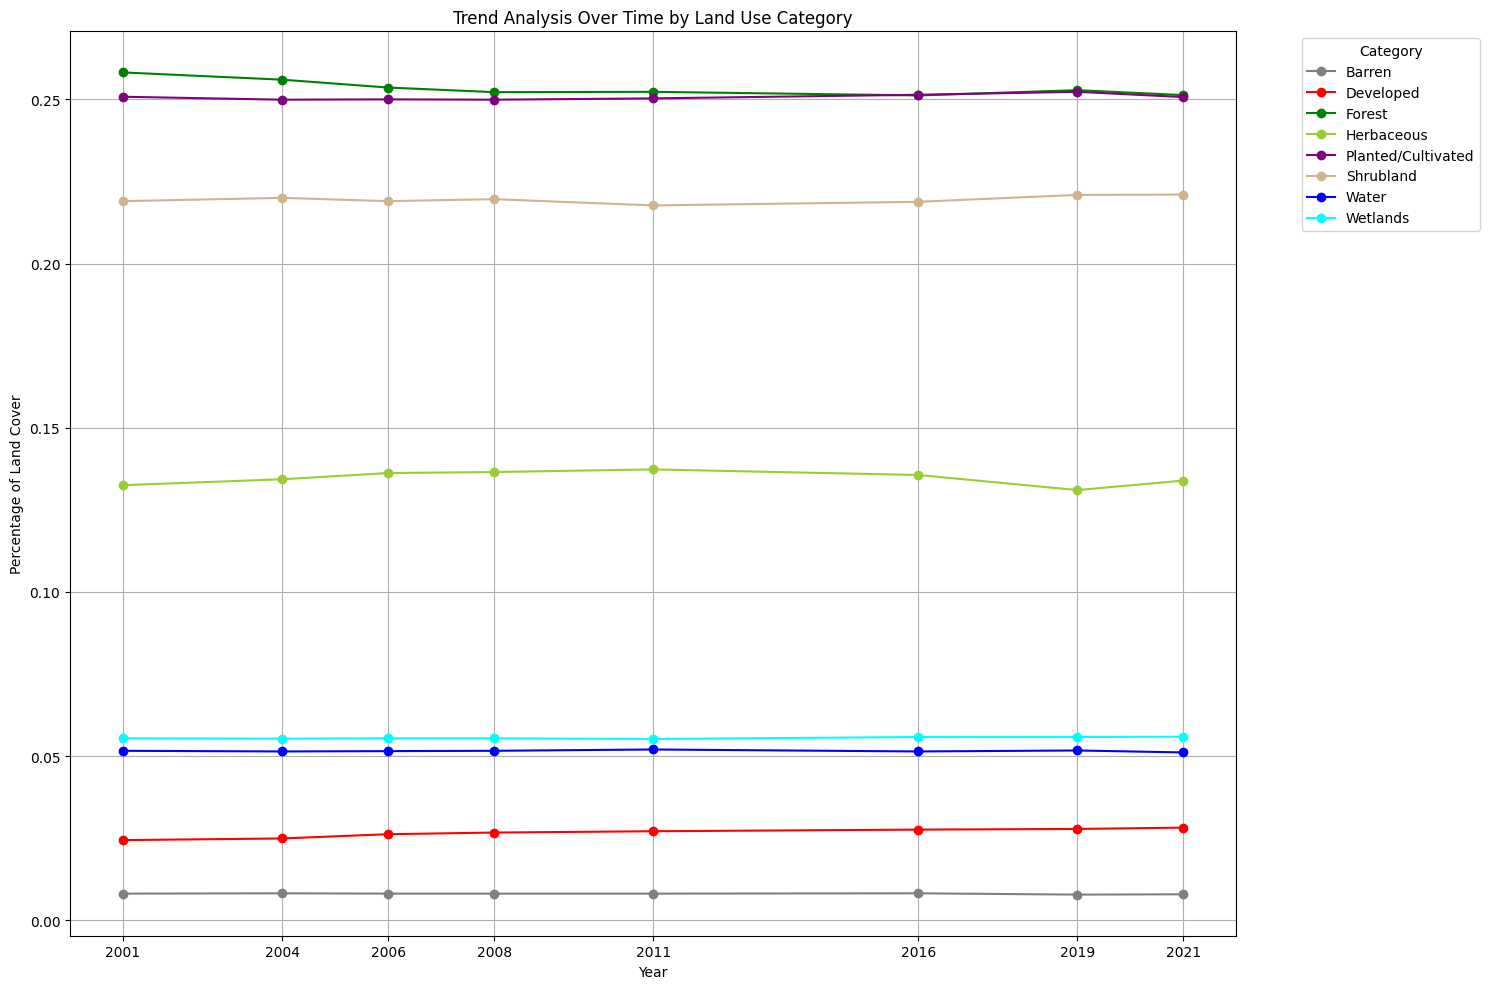

In [ ]:
from functools import reduce
import pandas as pd
import matplotlib.pyplot as plt

# We have the years list already defined
years = [2001, 2004, 2006, 2008, 2011, 2016, 2019, 2021]

# Define file names
file_names = ['nlcd1.csv', 'nlcd4.csv', 'nlcd6.csv', 'nlcd8.csv', 'nlcd11.csv', 'nlcd16.csv', 'nlcd19.csv', 'nlcd21.csv']

# Function to map the group numbers to the specified categories
def map_group_to_category(group):
    if group in [41, 42, 43]:
        return 'Forest'
    elif group in [11, 12]:
        return 'Water'
    elif group in [21, 22, 23, 24]:
        return 'Developed'
    elif group in [51, 52]:
        return 'Shrubland'
    elif group in [71, 72, 73, 74]:
        return 'Herbaceous'
    elif group in [81, 82]:
        return 'Planted/Cultivated'
    elif group in [90, 95]:
        return 'Wetlands'
    elif group == 31:
        return 'Barren'
    else:
        return 'Other'

# Initialize an empty list to store the dataframes
dfs = []

# Load the data, apply the mappings, and aggregate the data
for year, file_name in zip(years, file_names):
    # Load the data
    df = pd.read_csv(f'/content/{file_name}')

    # Apply the group mapping
    df['category'] = df['group'].apply(map_group_to_category)

    # Aggregate the percentages by the new categories
    df_grouped = df.groupby('category')['percentage'].sum().reset_index()

    # Rename the 'percentage' column to the corresponding year for clarity
    df_grouped.rename(columns={'percentage': year}, inplace=True)

    # Append the aggregated data to the list
    dfs.append(df_grouped)

# Merge all dataframes on the 'category' column
df_merged = reduce(lambda left, right: pd.merge(left, right, on='category', how='outer'), dfs)

# Replace NaN values with zeros assuming if data is not available for that year-category, its percentage is zero
df_merged.fillna(0, inplace=True)

# Transpose the DataFrame for plotting
df_trend = df_merged.set_index('category').T
df_trend.index.name = 'Year'
df_trend.reset_index(inplace=True)

# Plotting the trend over time for each aggregated category
plt.figure(figsize=(15, 10))

# The color map will be used to color each category consistently
color_map = {
    'Water': 'blue',
    'Developed': 'red',
    'Forest': 'green',
    'Shrubland': 'tan',
    'Herbaceous': 'yellowgreen',
    'Planted/Cultivated': 'purple',
    'Wetlands': 'aqua',
    'Barren': 'grey',
    'Other': 'black'  # Adding 'Other' for any unclassified or miscellaneous category
}

# Plot each category
for category in df_merged['category']:
    plt.plot(df_trend['Year'], df_trend[category], marker='o', label=category, color=color_map.get(category, 'grey'))

# Styling the plot
plt.title('Trend Analysis Over Time by Land Use Category')
plt.xlabel('Year')
plt.ylabel('Percentage of Land Cover')
plt.xticks(years)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


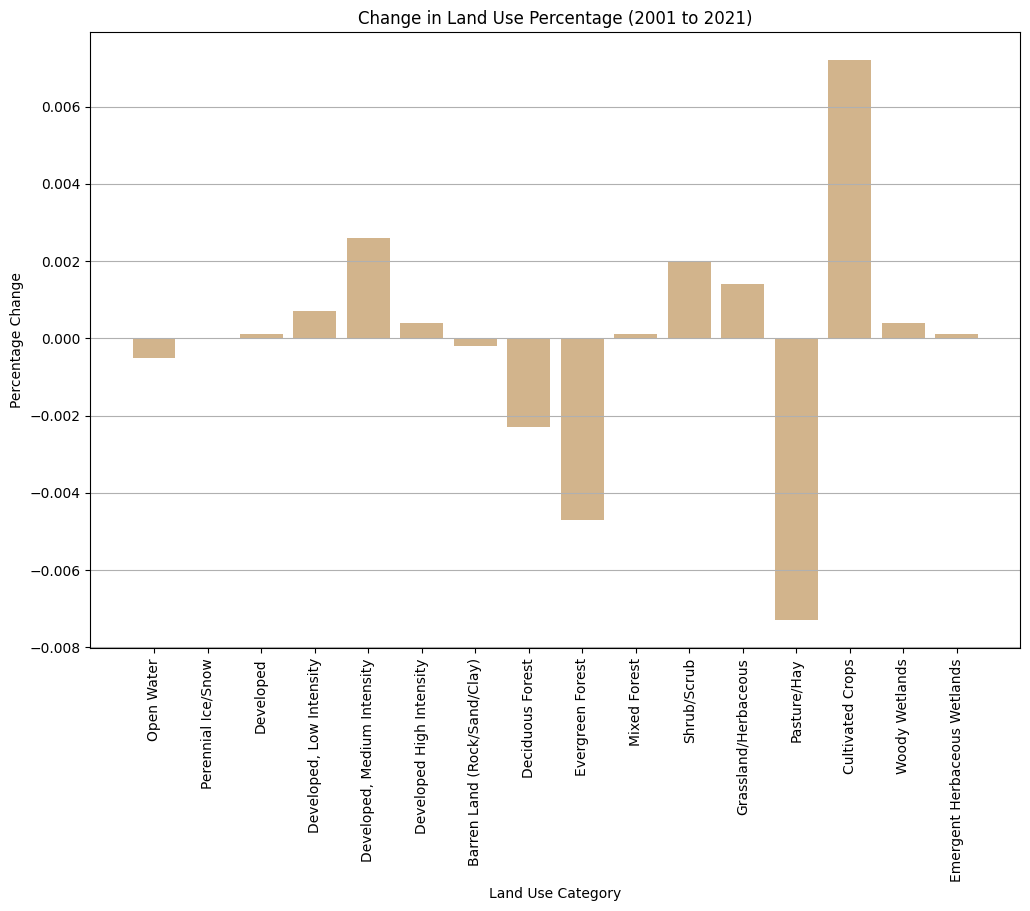

In [ ]:

# Merge the two datasets on the 'group' and 'label' columns
merged_df = pd.merge(nlcd1, nlcd21, on=['group', 'label'], suffixes=('_2001', '_2021'))

# Calculate the difference in percentages
merged_df['percentage_change'] = merged_df['percentage_2021'] - merged_df['percentage_2001']

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(merged_df['label'], merged_df['percentage_change'], color='tan')
plt.xticks(rotation=90)
plt.title('Change in Land Use Percentage (2001 to 2021)')
plt.xlabel('Land Use Category')
plt.ylabel('Percentage Change')
plt.grid(axis='y')

# Show the plot
plt.show()

In [17]:
Map = geemap.Map(center=(40, -100), zoom=4, height=600)
Map.add_basemap('HYBRID')
nlcd_2001 = ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2001').select('landcover').clipToCollection(knox_tn)
nlcd_2019 = ee.Image('USGS/NLCD_RELEASES/2021_REL/NLCD/2021').select('landcover').clipToCollection(knox_tn)

left_layer = geemap.ee_tile_layer(nlcd_2001, {}, 'NLCD 2001')
right_layer = geemap.ee_tile_layer(nlcd_2019, {}, 'NLCD 2021')

Map.split_map(left_layer, right_layer)
Map.add_legend(title='NLCD Land Cover Type', builtin_legend='NLCD', position='topright')

Map.centerObject(knox_tn)
Map.add_text('NLCD 2021')
Map.add_text('NLCD 2001', position = 'bottomleft')

Map

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

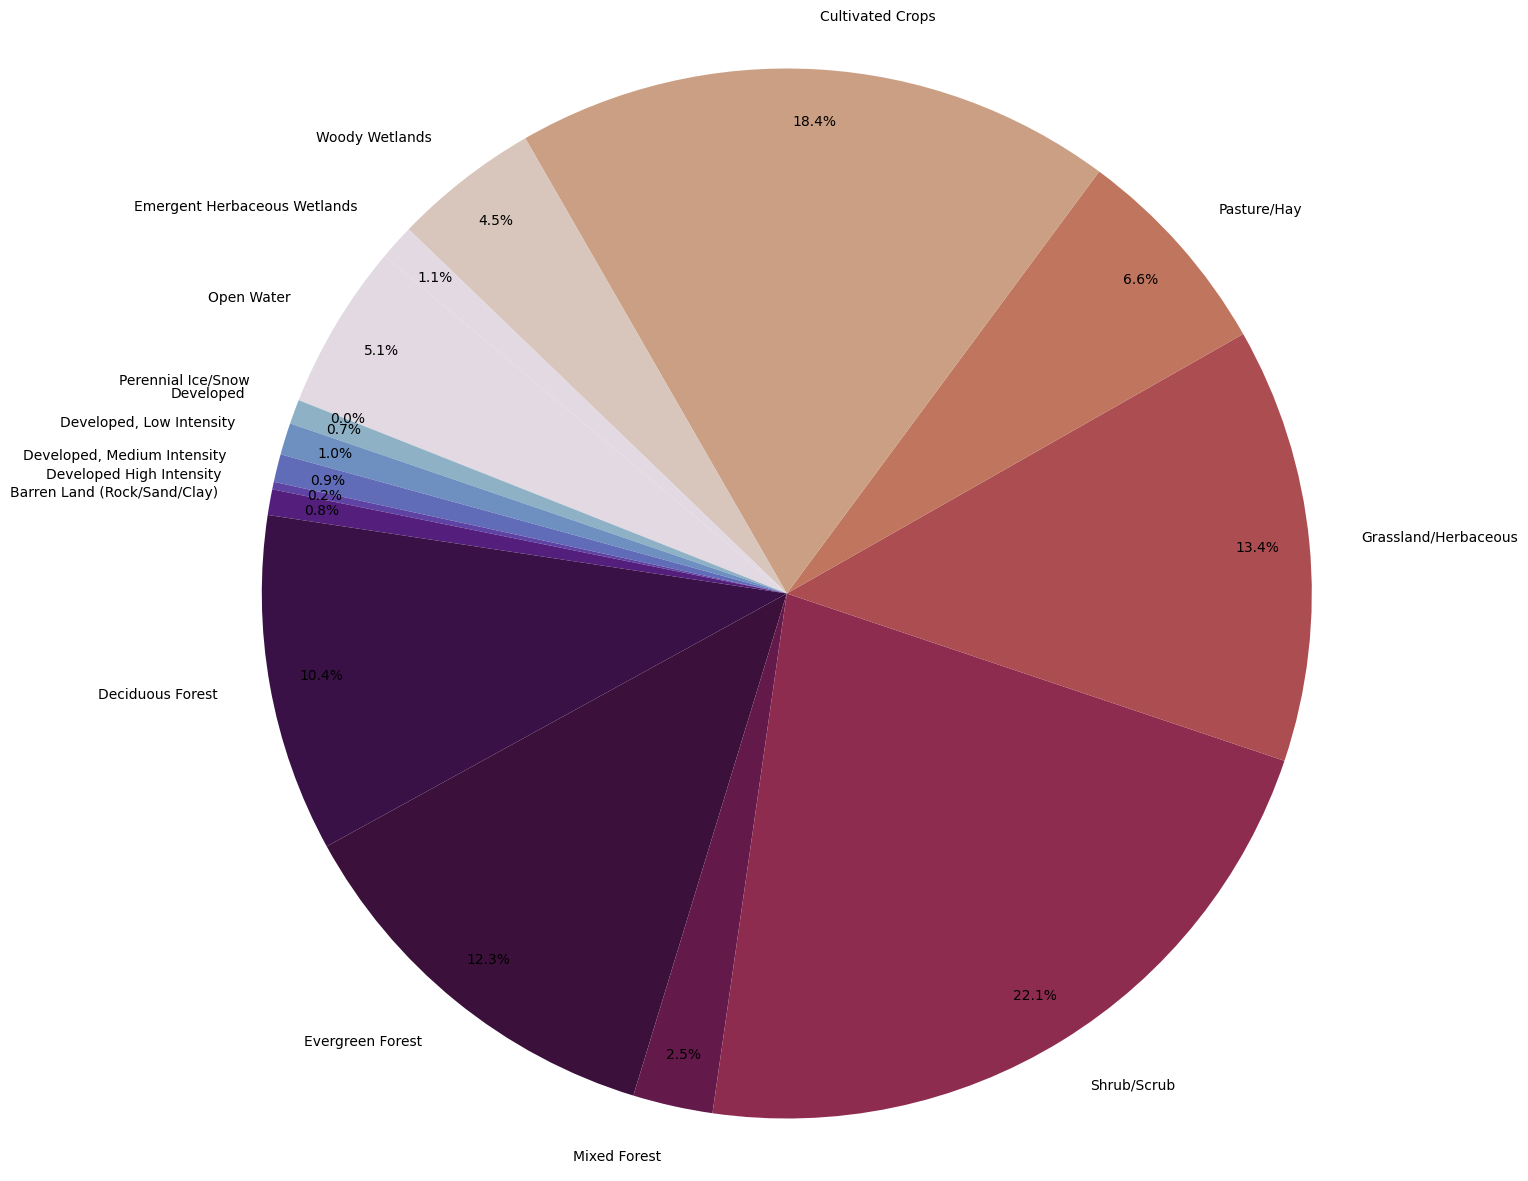

In [ ]:
# Create a pie chart
plt.figure(figsize=(18, 15))

colormap = plt.cm.twilight
colors = colormap(np.linspace(0, 1, len(nlcd21['label'])))

plt.pie(nlcd21['percentage'], labels=nlcd21['label'], autopct='%1.1f%%',pctdistance=0.9, startangle=140, colors = colors)

# plt.title('Land Use Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

In [19]:
# Appendix = I tried to make a change map using the 2001 and 2021 data. However it needs further polishing.
# Calculate the change
Map = geemap.Map()
change = nlcd_2019.subtract(nlcd_2001)

# Visualization parameters
change_vis = {
    'min': -20,
    'max': 20,
    'palette': ['red', 'white', 'blue']  # red: loss, blue: gain, white: no change
}

# Adding layer to the map

Map.addLayer(change, change_vis, 'Change 2001-2021')

Map.add_legend(title='NLCD Land Cover Type', builtin_legend='NLCD', position='topright')
Map.centerObject(knox_tn)
# Map.add_text('Change Analysis between NLCD 2001 and 2021', position='bottomleft')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…